In [3]:
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
# Carregando os dados
ratings = pd.read_csv(r"ratings.csv")
movies = pd.read_csv(r"movies.csv")
tags = pd.read_csv(r"tags.csv")
links = pd.read_csv(r"links.csv")



In [5]:
# Mesclar os datasets usando o movieId como chave
ratings_movies = pd.merge(ratings, movies, on='movieId', how='left')


In [6]:


# Contar número de avaliações por filme
popular_movies = ratings_movies['title'].value_counts().head(10)




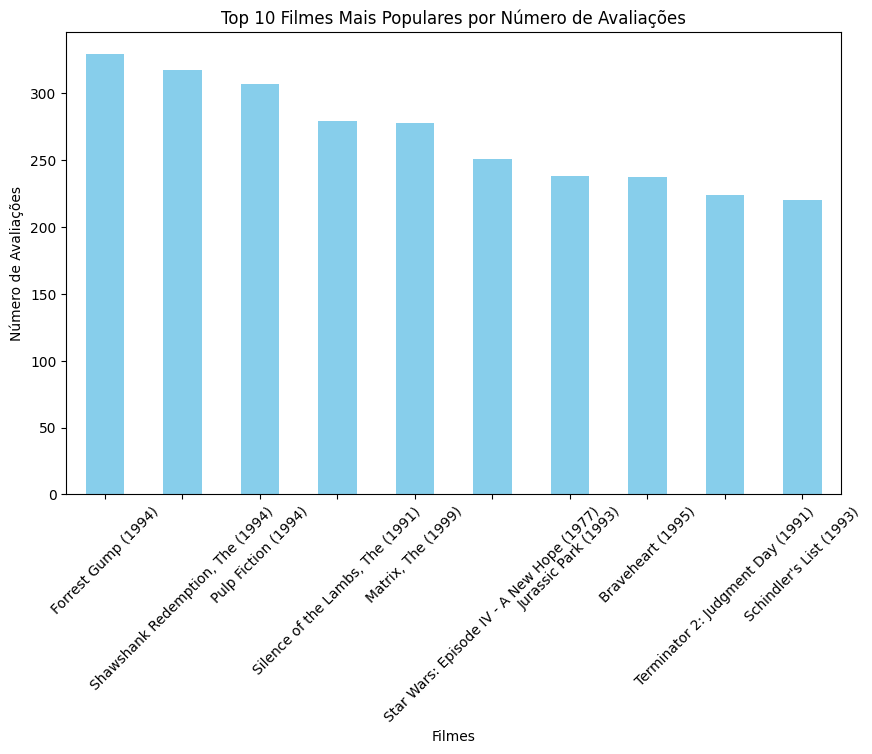

In [7]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
popular_movies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Filmes Mais Populares por Número de Avaliações')
plt.xlabel('Filmes')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45)
plt.show()


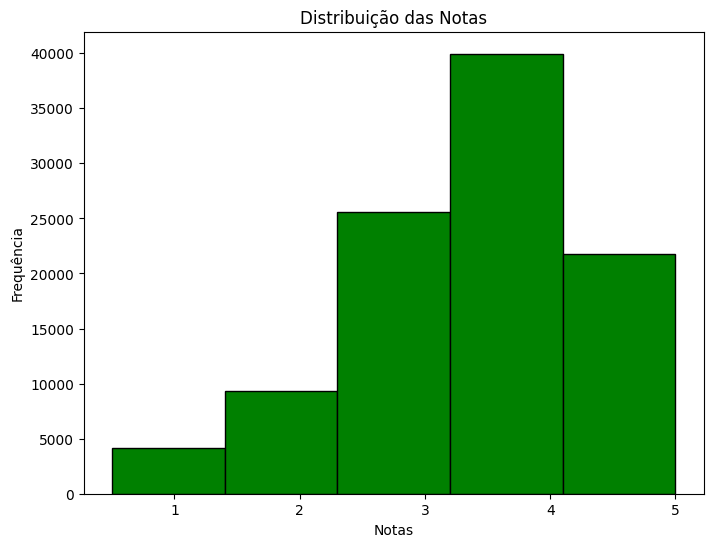

In [8]:

# Histograma - Distribuição das notas dadas pelos usuários
plt.figure(figsize=(8, 6))
plt.hist(ratings_movies['rating'], bins=5, color='green', edgecolor='black')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()





In [9]:
# Agrupar por filme e calcular a média de avaliação e a quantidade de avaliações
movie_stats = ratings_movies.groupby('title').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['mean_rating', 'rating_count']






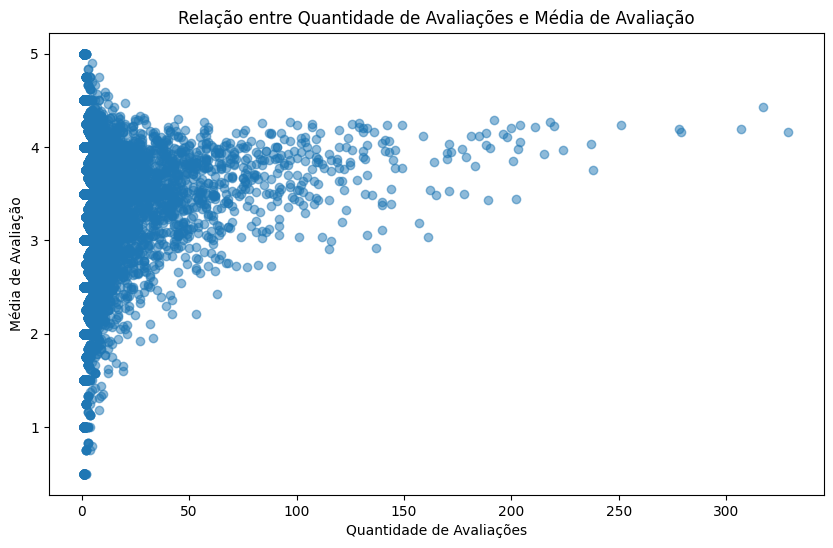

In [10]:
# Plotar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(movie_stats['rating_count'], movie_stats['mean_rating'], alpha=0.5)
plt.title('Relação entre Quantidade de Avaliações e Média de Avaliação')
plt.xlabel('Quantidade de Avaliações')
plt.ylabel('Média de Avaliação')
plt.show()

In [11]:
# Converter a coluna timestamp para formato de data
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')




In [12]:
# Calcular a média de avaliação ao longo do tempo
ratings['year'] = ratings['timestamp'].dt.year
avg_rating_per_year = ratings.groupby('year')['rating'].mean()



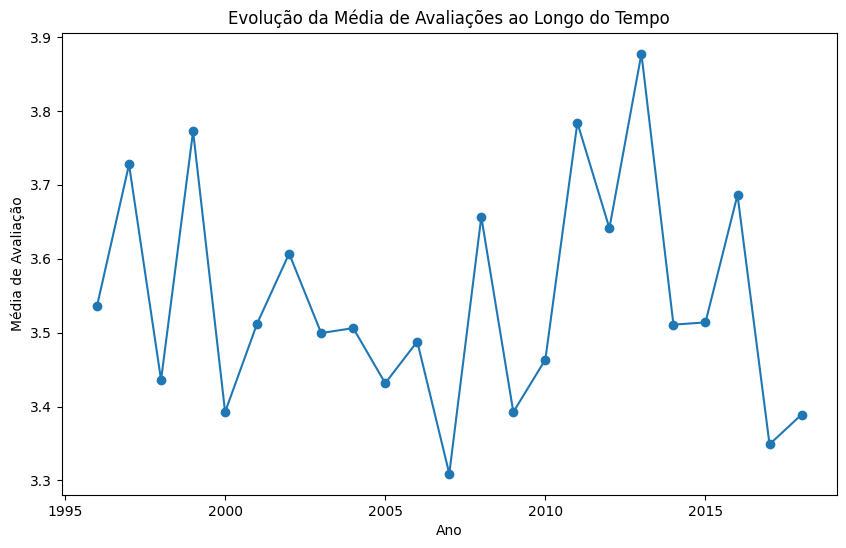

In [13]:
# Plotar gráfico de linha
plt.figure(figsize=(10, 6))
avg_rating_per_year.plot(kind='line', marker='o')
plt.title('Evolução da Média de Avaliações ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Média de Avaliação')
plt.show()

In [14]:
# Separar os gêneros dos filmes
genres_split = movies['genres'].str.get_dummies(sep='|')




In [15]:
# Adicionar as notas aos gêneros
ratings_with_genres = pd.concat([ratings_movies[['rating']], genres_split], axis=1)



In [16]:
# Calcular proporção de notas por gênero
rating_genre_prop = ratings_with_genres.groupby('rating').sum().div(ratings_with_genres.sum(axis=0), axis=1)



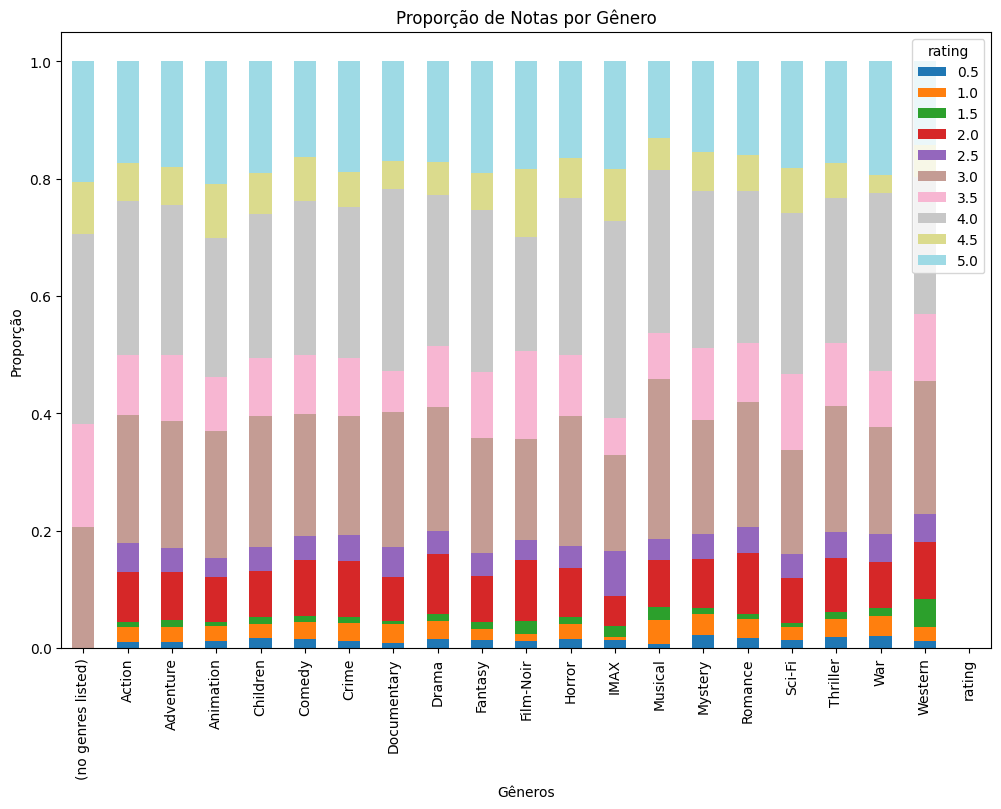

In [17]:
# Plotar gráfico de barras empilhadas
rating_genre_prop.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Proporção de Notas por Gênero')
plt.xlabel('Gêneros')
plt.ylabel('Proporção')
plt.show()